In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
trn_reg = pd.read_csv("../data/trn.reg.csv.gz", compression='gzip', low_memory=False)
tst_reg = pd.read_csv("../data/tst.reg.csv.gz", compression='gzip', low_memory=False)
trn_cls = pd.read_csv("../data/trn.EUOS-SLAS.csv.gz", compression='gzip')
tst_cls = pd.read_csv("../data/tst.EUOS-SLAS.csv.gz", compression='gzip')

In [4]:
trn_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14432 entries, 0 to 14431
Columns: 4467 entries, SMILES to CDKZagreb
dtypes: float64(1408), int64(3055), object(4)
memory usage: 491.8+ MB


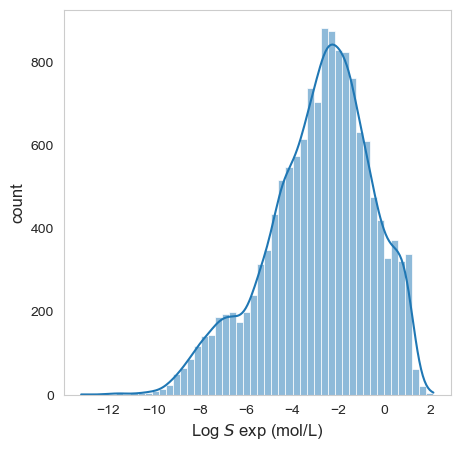

In [5]:
# Distribution of $\log S$ values in the training data prepared for regression problems.
_, ax = plt.subplots(figsize=(5, 5))
sns.histplot(trn_reg["LogS"], kde=True, bins=50, ax=ax)
ax.set_xlabel("Log $S$ exp (mol/L)", fontsize=12)
ax.set_ylabel("count", fontsize=12)
ax.grid(False)
plt.show()

## (Re-)Featurization using 2D Molecular Descriptors

The provided dataset already includes featurized molecular descriptors. Running the code in this section is optional.

In [4]:
from data.featurization.base import BaseRepresentation
from data.featurization.rdkit import Rdkit2D
from data.featurization.mordred import Mordred
from data.featurization.MACCSKeys import MACCSKeys
from data.featurization.circular import Circular
from data.featurization.mol2vec import Mol2Vec

In [5]:
def featurize(featurizer: BaseRepresentation, df):
    return featurizer.convert(df["SMILES"]).add_prefix(featurizer.__class__.__name__)

In [ ]:
pd.concat([
    trn_reg,
    featurize(Rdkit2D(), trn_reg),
    featurize(Mordred(), trn_reg),
    featurize(MACCSKeys(), trn_reg),
    featurize(Circular(), trn_reg),
], axis=1)#.to_csv("../data/trn.reg.csv.gz", compression="gzip")
pd.concat([
    trn_cls,
    featurize(Rdkit2D(), trn_cls),
    featurize(Mordred(), trn_cls),
    featurize(MACCSKeys(), trn_cls),
    featurize(Circular(), trn_cls),
], axis=1)#.to_csv("../data/trn.EUOS-SLAS.csv.gz", compression="gzip")

In [7]:
pd.concat([
    tst_reg,
    featurize(Rdkit2D(), tst_reg),
    featurize(Mordred(), tst_reg),
    featurize(MACCSKeys(), tst_reg),
    featurize(Circular(), tst_reg),
], axis=1)#.to_csv("../data/tst.reg.csv.gz", compression="gzip")
pd.concat([
    tst_cls,
    featurize(Rdkit2D(), tst_cls),
    featurize(Mordred(), tst_cls),
    featurize(MACCSKeys(), tst_cls),
    featurize(Circular(), tst_cls),
], axis=1)#.to_csv("../data/tst.EUOS-SLAS.csv.gz", compression="gzip")

Don't forget to use Java script to generate CDK descriptors.

Execute the following command:

```
cd cdk
<jdk\bin\java.exe> -classpath <classpath>;lib\cdk-2.8.jar;lib\commons-collections4-4.1.jar;lib\commons-beanutils-1.9.4.jar;lib\opencsv-5.7.1.jar;lib\slf4j-api-2.0.6.jar Main <dataset.csv>
```

Modify the path as needed. Note that the Java script expects the input file `<dataset.csv>` to include a column named `SMILES`.